# 同時確率分布と条件付き確率分布の理解を深めるために演習を行う

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import copy
import math
import japanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [37]:
# nCrを返す。小数第2を四捨五入。使いませんでした
def comb(n, r):
    if n == 0 or r == 0:
        return 0
    denominator = 1
    for i in range(r):
        denominator *= n - i
    molecule = [j for j in range(1, r + 1)]
    molecule = math.prod(molecule)
    return denominator / molecule

例：）A君はB君とコンビニでドラゴンボールの一番クジを引きに来ました。
箱の中には、49個くじが残っており、それぞれ5等が30個、4等が10個、3等が5個、2等が3個、1等が1個残っている。
くじを引く順はA君が引いたあとにB君が引き、同時に何等か確認します。
この時の同時確率分布をpandasのdataframeで表せ。

同時確率分布は以下の式で表される
$$
P(Y = y_j, X = x_i)
$$

A君が1等でB君が1等の確率。
$$
P(Y = y_j, X = x_i) = \frac{1}{49} * \frac{0}{48} = 0
$$

A君が1等でB君が2等を引く確率
$$
P(Y = y_j, X = x_i) = \frac{1}{49} * \frac{3}{48} = 0.00127551
$$



In [38]:
# 確率変数
random_variable = {"1等": 1, "2等": 3, "3等": 5, "4等": 10, "5等": 30}
random_variable_keys = list(random_variable)

# 元々のくじの数
lot_num = sum(random_variable.values())
# 同時確率分布を表すデータフレーム
simultaneous_probability_distribution_df = pd.DataFrame(index=random_variable_keys, columns=random_variable_keys)


for i in random_variable_keys:
    random_variable_copy = copy.deepcopy(random_variable)
    x_i = random_variable_copy[i]
    # A君が1個くじを引くため、1を引く
    random_variable_copy[i] -= 1 
    for j in random_variable_keys:
        y_j = random_variable_copy[j]

        # 0で割ろうとした時、同時確率0.0を返す。
        if x_i == 0 or y_j == 0:
            simultaneous_probability_distribution_df.loc[i, j] = 0.0
        else:
            simultaneous_probability = (x_i / lot_num) * (y_j / (lot_num - 1))
            simultaneous_probability_distribution_df.loc[i, j] = simultaneous_probability


# 周辺分布（列方向：P(Y)）
simultaneous_probability_distribution_df['P(Y)'] = simultaneous_probability_distribution_df.sum(axis=0)  # 各列の合計（縦方向の周辺分布）
# 周辺分布（行方向：P(X)）
simultaneous_probability_distribution_df.loc['P(X)'] = simultaneous_probability_distribution_df.sum(axis=0)  # 各行の合計（横方向の周辺分布）
print(simultaneous_probability_distribution_df)


            1等        2等        3等        4等        5等      P(Y)
1等         0.0  0.001276  0.002126  0.004252  0.012755  0.020408
2等    0.001276  0.002551  0.006378  0.012755  0.038265  0.061224
3等    0.002126  0.006378  0.008503  0.021259  0.063776  0.102041
4等    0.004252  0.012755  0.021259  0.038265  0.127551  0.204082
5等    0.012755  0.038265  0.063776  0.127551  0.369898  0.612245
P(X)  0.020408  0.061224  0.102041  0.204082  0.612245       1.0


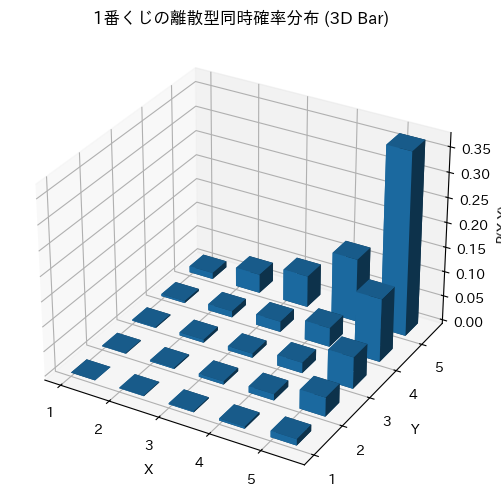

In [39]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# X, Y, 確率変数 P(X = x_i, Y = y_j)

X, Y = np.meshgrid([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
X = X.flatten()
Y = Y.flatten()

# 周辺確率を含まず、同時確率のみ抽出
P = simultaneous_probability_distribution_df.iloc[:5, :5].to_numpy(np.float64).flatten()

# 3D棒グラフの描画 dzとdyは棒グラフ1つ分ののx軸とy軸の幅, dzは棒グラフの高さ, shade=Trueは影をつける
ax.bar3d(X, Y, np.zeros_like(P), dx=0.5, dy=0.5, dz=P, shade=True)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("P(X,Y)")
ax.set_title("1番くじの離散型同時確率分布 (3D Bar)")
plt.show()


# 条件付き確率分布を求める

$$
P(Y = y_j | X = x_i) = \frac{P(X = x_i, Y = y_j)}{P(X = x_i)} = \frac{P(X = x_i \cap Y = y_j)}{P(X = x_i)}
$$
A君が1等を引いた時、B君が1等の確率
$$
P(Y = y_j | X = 1) = \frac{P(X = 1, Y = 1)}{P(X = 1)} = \frac{0.0}{0.020409} = 0
$$

A君が1等でB君が2等を引く確率
$$
P(Y = y_j | X = 1) = \frac{P(X = 1, Y = 2)}{P(X = 1)} = \frac{0.001276}{0.020409} = 0.062521437
$$



In [40]:
# 条件付き確率分布を格納するデータフレーム
conditional_probability_distribution_df = pd.DataFrame(index=random_variable_keys, columns=random_variable_keys)
for x_i in random_variable_keys:
    for y_j in random_variable_keys:
        # 条件付き確率を計算
        conditional_probability = simultaneous_probability_distribution_df.loc[y_j, x_i] / simultaneous_probability_distribution_df.loc["P(X)", x_i]
        conditional_probability_distribution_df.loc[y_j, x_i] = conditional_probability
    
print(conditional_probability_distribution_df)

          1等        2等        3等        4等        5等
1等       0.0  0.020833  0.020833  0.020833  0.020833
2等    0.0625  0.041667    0.0625    0.0625    0.0625
3等  0.104167  0.104167  0.083333  0.104167  0.104167
4等  0.208333  0.208333  0.208333    0.1875  0.208333
5等     0.625     0.625     0.625     0.625  0.604167


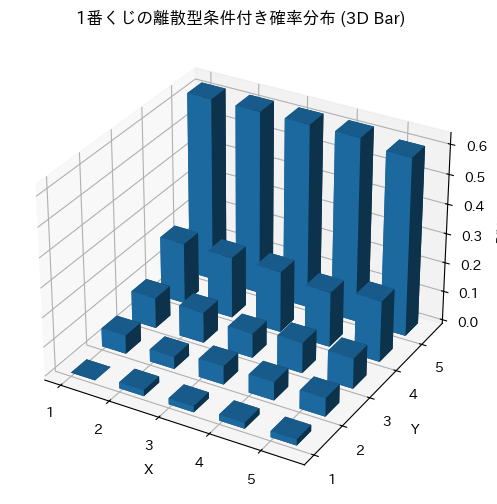

In [41]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# X, Y, 確率変数 P(X = x_i, Y = y_j)

X, Y = np.meshgrid([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
X = X.flatten()
Y = Y.flatten()

# 周辺確率を含まず、同時確率のみ抽出
P = conditional_probability_distribution_df.iloc[:5, :5].to_numpy(np.float64).flatten()

# 3D棒グラフの描画 dzとdyは棒グラフ1つ分ののx軸とy軸の幅, dzは棒グラフの高さ, shade=Trueは影をつける
ax.bar3d(X, Y, np.zeros_like(P), dx=0.5, dy=0.5, dz=P, shade=True)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("P(X,Y)")
ax.set_title("1番くじの離散型条件付き確率分布 (3D Bar)")
plt.show()